In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%config IPCompleter.greedy=True #to enable intellisense: see it when hitting tab
from sklearn.preprocessing import LabelEncoder # to transform categorical variable into integer
from sklearn.preprocessing import StandardScaler # to scale our data
from sklearn.decomposition import PCA #PCA

# Data preposessing:

In [2]:
music_df = pd.read_csv("C:/Users/Lisa/Desktop/Leuphana/3. Semester/ML lab/SpotifyFeatures.csv", ",") 

In [3]:
#check for NA's in Dataframe:
music_df.isnull().values.any()

False

In [4]:
#search for duplicates:
search = pd.DataFrame.duplicated(music_df)
print(search[search == True])#no duplicates

Series([], dtype: bool)


In [5]:
music_df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


### Variables:
- popularity: ?
- key: The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation (E.g.: 0 = C)
- mode: modality (major or minor) of a track (Major = 1 and Minor = 0) ? 
- time_signature:  estimated overall time signature (Taktangabe) of a track. Its a notational convention to specify how many beats are in each bar (or measure).
- title: maybe there is a way to also include strings? 

## Transform variables:

### 1. key:

In [6]:
music_df["key"].value_counts()

C     27583
G     26390
D     24077
C#    23201
A     22671
F     20279
B     17661
E     17390
A#    15526
F#    15222
G#    15159
D#     7566
Name: key, dtype: int64

In [7]:
## we are not using an integer encoder here because the numbers for the nodes are predetermined
# create dictionary for integer mapping:
key_mapping = {"C": 0,"G": 7,"D": 2, "C#": 1, "A": 9, "F": 5, "B": 11, "E": 4, "A#": 10, "F#": 6, "G#": 8, "D#": 3}
# map the nodes to integers:
music_df["key"] = music_df.key.map(key_mapping)
music_df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,1,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,6,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,0,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,1,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,5,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


### 2. Genre:

In [8]:
music_df["genre"].value_counts()

Comedy              9681
Soundtrack          9646
Indie               9543
Jazz                9441
Pop                 9386
Electronic          9377
Children’s Music    9353
Folk                9299
Hip-Hop             9295
Rock                9272
Alternative         9263
Classical           9256
Rap                 9232
World               9096
Soul                9089
Blues               9023
R&B                 8992
Anime               8936
Reggaeton           8927
Ska                 8874
Reggae              8771
Dance               8701
Country             8664
Opera               8280
Movie               7806
Children's Music    5403
A Capella            119
Name: genre, dtype: int64

In [9]:
# Integer encoding of variable genre
# other option: hot encoding ( I think thats more the "right way to do it but than we add a column for each genre)
# https://towardsdatascience.com/categorical-encoding-techniques-93ebd18e1f24
label_encoder = LabelEncoder()
music_df['genre'] = label_encoder.fit_transform(music_df['genre'])
music_df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,15,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,1,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,15,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,6,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,15,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,0,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,15,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,1,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,15,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,5,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [10]:
music_df["genre"].value_counts()

7     9681
25    9646
13    9543
14    9441
17    9386
10    9377
5     9353
11    9299
12    9295
22    9272
1     9263
6     9256
19    9232
26    9096
24    9089
3     9023
18    8992
2     8936
21    8927
23    8874
20    8771
9     8701
8     8664
16    8280
15    7806
4     5403
0      119
Name: genre, dtype: int64

In [11]:
## 3. Mode:

In [12]:
music_df["mode"].value_counts()

Major    151744
Minor     80981
Name: mode, dtype: int64

In [13]:
music_df["mode"] = music_df["mode"].replace({"Major": 1, "Minor":0})
music_df["mode"].value_counts()

1    151744
0     80981
Name: mode, dtype: int64

### 4. time_signature

I will transform the string into a fraction (float) (if thats correct? -> music expert Chan what do you think?)

In [14]:
music_df["time_signature"].value_counts()

4/4    200760
3/4     24111
5/4      5238
1/4      2608
0/4         8
Name: time_signature, dtype: int64

In [15]:
# create dictionary for integer mapping:
time_signature_mapping = {"4/4": 1,"3/4": 3/4,"5/4": 5/4, "1/4": 1/4, "0/4": 0}
# map the nodes to integers:
music_df["time_signature"] = music_df.time_signature.map(time_signature_mapping)
music_df["time_signature"].value_counts()

1.00    200760
0.75     24111
1.25      5238
0.25      2608
0.00         8
Name: time_signature, dtype: int64

## Standardize Data: 

For better performance of the algorithms and PCA standardize the data (mean = 0, variance = 1)

In [16]:
music_df_scaled = music_df.copy()
col_names = ["genre", "popularity", "acousticness","danceability","duration_ms","energy","instrumentalness","key","liveness","loudness","mode","speechiness","tempo","time_signature","valence" ]
features = music_df_scaled[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
music_df_scaled[col_names] = features
music_df_scaled.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0.183772,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,-2.261007,0.683376,-0.890935,-1.141368,1.286908,-0.489819,-1.185135,0.660661,1.290703,0.730526,-0.367970,1.595607,0.248086,1.380744
1,0.183772,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,-2.206031,-0.345467,0.191994,-0.821867,0.630249,-0.489819,0.217500,-0.322835,0.668683,-1.368876,-0.183082,1.823253,0.248086,1.388435
2,0.183772,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,-2.096080,1.644570,0.585296,-0.545298,-1.669954,-0.489819,-1.465663,-0.564927,-0.718402,-1.368876,-0.455832,-0.588326,2.408128,-0.334212
3,0.183772,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,-2.261007,0.942701,-1.693703,-0.695295,-0.929789,-0.489819,-1.185135,-0.587623,-0.434817,0.730526,-0.438044,1.750597,0.248086,-0.876384
4,0.183772,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,-2.041104,1.638932,-1.203422,-1.282184,-1.313157,-0.083566,-0.063027,-0.065613,-1.930601,0.730526,-0.405163,0.741433,0.248086,-0.249618


# Data Analysis

## 1. First Overview 

In [41]:
print(music_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  int32  
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  int64  
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  int64  
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

## 2. Plots

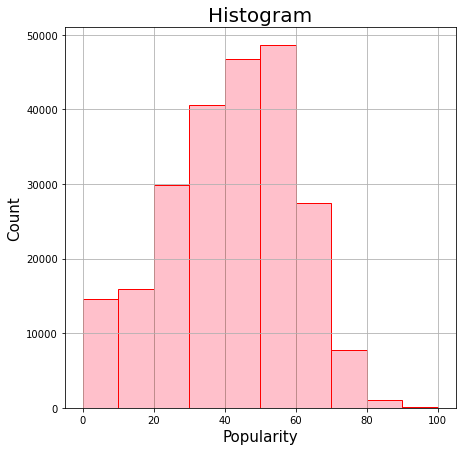

In [40]:
fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Popularity', fontsize = 15)
ax.set_ylabel('Count', fontsize = 15)
ax.set_title('Histogram', fontsize = 20)
plt.hist(music_df["popularity"], facecolor = "pink", edgecolor = "r")
ax.grid()

## 3. Correlation:

In [17]:
pd.DataFrame.corr(music_df)

,genre,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
genre,1.000000,0.103789,-0.027295,0.001386,-0.005492,-0.070847,0.043032,0.006932,-0.095538,-0.031527,-0.042757,-0.135883,-0.017240,0.026125,-0.031897
popularity,0.103789,1.000000,-0.381295,0.256564,0.002348,0.248922,-0.210983,0.012190,-0.167995,0.363011,-0.070550,-0.151076,0.081039,0.142269,0.060076
acousticness,-0.027295,-0.381295,1.000000,-0.364546,0.011203,-0.725576,0.316154,-0.026297,0.069004,-0.690202,0.055907,0.150935,-0.238247,-0.222495,-0.325798
danceability,0.001386,0.256564,-0.364546,1.000000,-0.125781,0.325807,-0.364941,0.030046,-0.041684,0.438668,-0.061890,0.134560,0.021939,0.190614,0.547154
duration_ms,-0.005492,0.002348,0.011203,-0.125781,1.000000,-0.030550,0.076021,0.003795,0.023783,-0.047618,-0.011555,-0.016171,-0.028456,0.000942,-0.141811
energy,-0.070847,0.248922,-0.725576,0.325807,-0.030550,1.000000,-0.378957,0.032128,0.192801,0.816088,-0.041302,0.145120,0.228774,0.185699,0.436771
instrumentalness,0.043032,-0.210983,0.316154,-0.364941,0.076021,-0.378957,1.000000,-0.017168,-0.134198,-0.506320,-0.049823,-0.177147,-0.104133,-0.098657,-0.307522
key,0.006932,0.012190,-0.026297,0.030046,0.003795,0.032128,-0.017168,1.000000,0.002685,0.026300,-0.142132,0.012279,-0.003073,0.011189,0.038078
liveness,-0.095538,-0.167995,0.069004,-0.041684,0.023783,0.192801,-0.134198,0.002685,1.000000,0.045686,0.018459,0.510147,-0.051355,-0.065233,0.011804
loudness,-0.031527,0.363011,-0.690202,0.438668,-0.047618,0.816088,-0.506320,0.026300,0.045686,1.000000,-0.027109,-0.002273,0.228364,0.204395,0.399901


## 4. PCA

In [18]:
#Transform the popularity variable into ranges:
bins = [0,10, 20, 30, 45, 50, 60, 70, 80, 90, 100]
Y = pd.cut(music_df["popularity"],bins, include_lowest=True, right = True) 
# Y['popularity'] = Y['popularity'].apply(str)
# Y.popularity = Y.popularity.astype(str)

In [19]:
# drop all non-numerical values and the target variable popularity so that we can apply PCA on the numerical-only dataframe
music_df_scaled_num = music_df_scaled[["genre", "acousticness","danceability","duration_ms","energy","instrumentalness","key","liveness","loudness","mode","speechiness","tempo","time_signature","valence"]]


In [23]:
#PCA:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(music_df_scaled_num)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, Y], axis = 1)
finalDf.popularity = finalDf.popularity.apply(str)# change buckets to string for PCA plot to work
finalDf.head()

,principal component 1,principal component 2,popularity
0,-1.554814,0.098686,"(-0.001, 10.0]"
1,-1.833751,-0.705225,"(-0.001, 10.0]"
2,1.261305,-0.741990,"(-0.001, 10.0]"
3,1.479613,-0.783046,"(-0.001, 10.0]"
4,2.460277,-0.167200,"(-0.001, 10.0]"


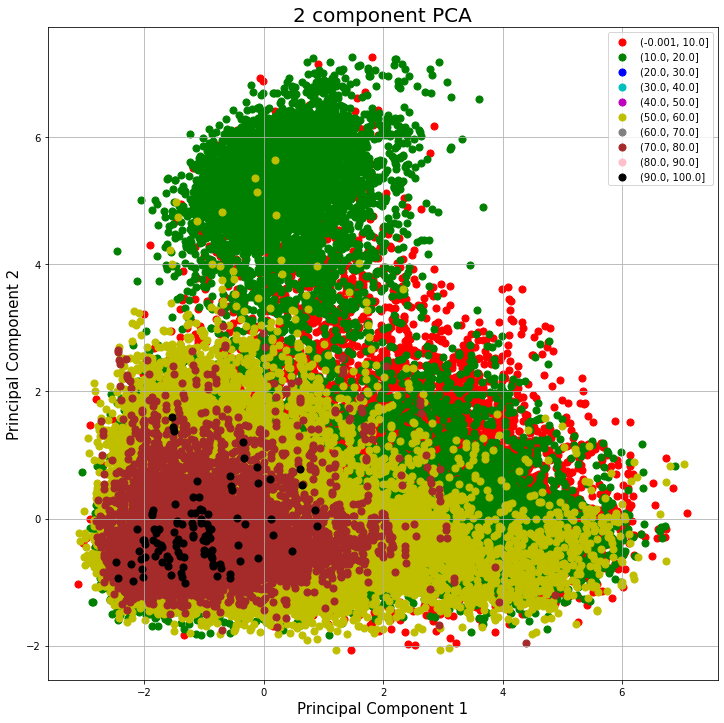

In [28]:
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ["(-0.001, 10.0]", "(10.0, 20.0]","(20.0, 30.0] ","(30.0, 40.0]","(40.0, 50.0]","(50.0, 60.0]" ,"(60.0, 70.0] ","(70.0, 80.0]","(80.0, 90.0] ","(90.0, 100.0]"]
colors = ['r', 'g', 'b', "c", "m", "y", "gray", "brown","pink","k"]
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['popularity'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()